# Core Algorithms to be used in TF
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

## Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values. 

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

*This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear*

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### Data
The Titanic data


#### Loading and cleaning data

In [21]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # Removing the y labels
y_eval = dfeval.pop('survived') # Remove the y_labels in the evaluation dataset

In [22]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [23]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

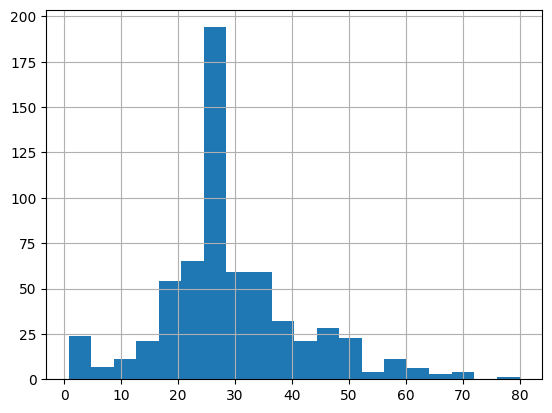

In [24]:
dftrain.age.hist(bins=20)

Text(0.5, 0, '% survive')

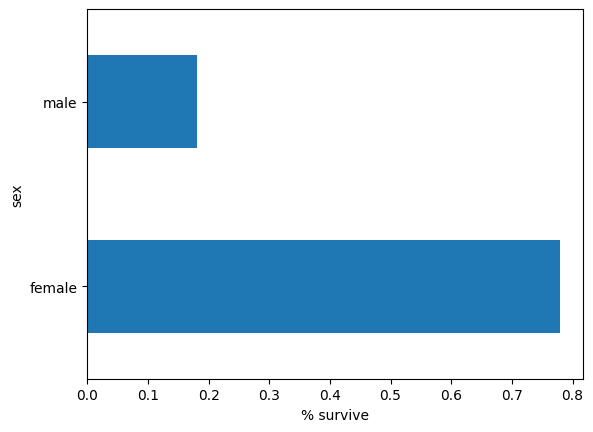

In [25]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### Training and Testing the data


##### Feature Columns

This dataset has both categorical and numerical data 
- Categorical being "male" or "female"
- Numerical being 0's and 1's

To continue, we have to encode each category with an integer

In [26]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_colums= []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets unique elements in each column
    feature_colums.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_colums.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_colums)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

##### Training and use of input function

Epoch is simply one stream of our entire dataset and determines how many times oyr model will see/view the dataset values

Batches - Small packets/ blocks of our input data that minimizes the amount of computer resource to be used and also help fasten training process of a model

Input Function - Converts our pandas dataframe into the ```tf.data.dataset``` object

In [41]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds =ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_fn

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False,num_epochs=1)

##### Creating the Model

In [42]:
lin_model = tf.estimator.LinearClassifier(feature_columns=feature_colums)
clear_output()

##### Train the model

We just pass the input function thatwe created earlier


In [43]:
lin_model.train(train_input_fn)
result = lin_model.evaluate(eval_input_fn)
clear_output()

In [44]:
print(result['accuracy'])

0.7651515


#### Prediction
```.predict()``` function is used


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Thorne\AppData\Local\Temp\tmp4s47bu23\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'Predicted Probabilities'}, ylabel='Frequency'>

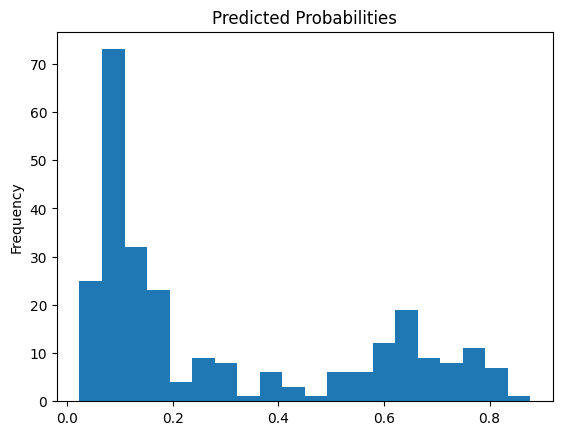

In [46]:
pred_dict = list(lin_model.predict(eval_input_fn))
prob = pd.Series([pred['probabilities'][1] for pred in pred_dict])
prob.plot(kind='hist', bins =20, title= 'Predicted Probabilities')

## Classification